In [1]:
!pip install pandas --upgrade

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.5)


In [2]:
pip install  fsspec==0.7.4 

In [3]:
import re
import pandas as pd
import datetime as dt

In [4]:
def read_kko_msg(filename):
    with open(filename, encoding='utf-8') as f:
        msg_list = f.readlines()
    return msg_list

def apply_kko_regex(msg_list):
    kko_pattern = re.compile("\[([\S\s]+)\] \[(오전|오후) ([0-9:\s]+)\] ([^\n]+)")
    kko_date_pattern = re.compile("--------------- ([0-9]+년 [0-9]+월 [0-9]+일) ")

    emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)

    kko_parse_result = list()
    cur_date = ""

    for msg in msg_list:
        # 날짜 부분인 경우
        if len(kko_date_pattern.findall(msg)) > 0:
            cur_date = dt.datetime.strptime(kko_date_pattern.findall(msg)[0], "%Y년 %m월 %d일")
            cur_date = cur_date.strftime("%Y-%m-%d")
        else:
            kko_pattern_result = kko_pattern.findall(msg)
            if len(kko_pattern_result) > 0:
                tokens = list(kko_pattern_result[0])
                # 이모지 데이터 삭제
                tokens[-1] = re.sub(emoji_pattern, "", tokens[-1])
                tokens.insert(0, cur_date)
                kko_parse_result.append(tokens)


# 카카오톡 대화를 column 이름 정해서 datafrma 형태로 만들기 
    kko_parse_result = pd.DataFrame(kko_parse_result, columns=["Date", "User", "timetype", "time", "Message"])

# column 이름 정해서 csv파일로 만들어 주는 코드
# "kko_regex" 이부분은 하고 싶은 이름 마음대로
    kko_parse_result.to_csv("kko_regex.csv", index=False)
    return kko_parse_result


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
if __name__ == '__main__':
    msg_list = read_kko_msg("/content/drive/MyDrive/Colab Notebooks/kakaotalk1.txt")
    apply_kko_regex(msg_list)


In [8]:
# 위에서 만든 csv 카카오톡 데이터 확인
data3 = pd.read_csv("kko_regex.csv")
data3.head()

,Date,User,timetype,time,Message
0,2020-02-29,조은영,오후,9:26,사진
1,2020-02-29,조은영,오후,9:26,ㅠㅠ넘 많이 쓴다아아
2,2020-02-29,조은영,오후,9:38,재정관리와 자기관리를 위해
3,2020-03-01,조은영,오전,12:09,안녕히주무세요~!
4,2020-03-01,손정희,오전,12:09,이모티콘


# 데이터 정제

In [9]:
# 메세지만 따로 불러옵니다.
corpus = data3['Message'] 
corpus

0                           사진
1                  ㅠㅠ넘 많이 쓴다아아
2               재정관리와 자기관리를 위해
3                    안녕히주무세요~!
4                         이모티콘
                 ...          
4305                        사진
4306                  근데너무소액이라
4307    아 자동걸어놓고 빠지는바람에 다시 주었어
4308             근데 리플모야 무서웤ㅋㅋ
4309           하락장때 줍줍하기 잘했닼ㅋㅋ
Name: Message, Length: 4310, dtype: object

In [10]:
# 데이터 전처리를 위한 전체 데이터의 특징을 빈도분석으로 파악해봅니다.

import nltk
#corpus를 msg라고 하고 가지고 올건데 2중 for문을 쓴다.
# 왜 이중 for문? 카카오톡 내용들을 string으로 가져와서 잘라와야 한다. 
# 모두 string이 아닐수도 있기 때문에 숫자면 자동으로 int라 전부다 토큰으로 만들어 오기 위해서
total_tokens = [token for msg in corpus for token in str(msg).split()]
print(len(total_tokens))

13340


In [12]:
text = nltk.Text(total_tokens, name='NMSC')
print(len(set(text.tokens)))
print(text.vocab().most_common(10))

9783
[('사진', 620), ('동영상', 47), ('2장', 46), ('다', 45), ('이제', 44), ('엄마', 43), ('이모티콘', 42), ('오늘', 40), ('아빠', 39), ('잘', 33)]


In [14]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


Unknown system... sorry~~~~


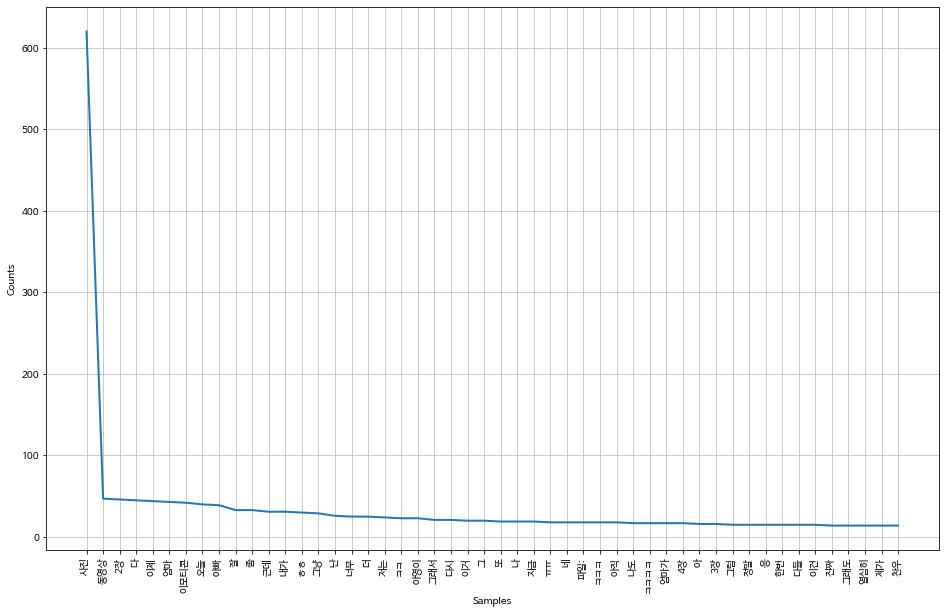

In [16]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')


if platform.system() == 'Darwin':
    rc('font', family='NanumBarunGothic')
elif platform.system() == 'Windows':
    rc('font', family='NanumBarunGothic')
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(50)

In [17]:
def message_cleaning(docs):

    """
        1. Photo, Emoticon은 그 내용을 알 수 없으므로 제거.
        
        2. 자음/모음 표현 처리방법.
        
            1) "ㅇㅇ" ,"ㅋㅋㅋㅋㅋ" 같은 자음만 존재하는 표현이나, "ㅡㅡ", "ㅠㅠ" 같은 모음만 존재하는 표현들은
            의미는 있으나 중요한 의미를 가지고 있지 않다고 판단하여 제거.
            
            2) 이러한 표현들도 전부 emoticon 같은 감정 표현의 의성어로 쓰거나, 단축 표현이므로 제거하지 않음. 
            
        3. http:// 로 시작하는 hyperlink 제거.
        
        4. 특수문자 제거.
    
    """
    # Series의 object를 str로 변경.
    docs = [str(doc) for doc in docs]
    
    # 1
    pattern1 = re.compile("Photo|Emoticon")
    docs = [pattern1.sub("", doc) for doc in docs]
    
    # 2
    pattern2 = re.compile("[ㄱ-ㅎ]*[ㅏ-ㅢ]*")
    docs = [pattern2.sub("", doc) for doc in docs]
    
    # 3
    pattern3 = re.compile(r"\b(https?:\/\/)?([\w.]+){1,2}(\.[\w]{2,4}){1,2}(.*)")
    docs = [pattern3.sub("", doc) for doc in docs]
    
    # 4
    pattern4 = re.compile("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]")
    docs = [pattern4.sub("", doc) for doc in docs]

    return docs

def define_stopwords(path):
    
    SW = set()
    # 불용어를 추가하는 방법 1.
    # SW.add("있다")
    
    # 불용어를 추가하는 방법 2.
    # stopwords-ko.txt에 직접 추가
    
    with open(path) as f:
        for word in f:
            SW.add(word)
            
    return SW

def text_tokenizing(doc):
    return [word for word in mecab.morphs(doc) if word not in SW and len(word) > 1]
    
    # wordcloud를 위해 명사만 추출하는 경우.
    #return [word for word in mecab.nouns(doc) if word not in SW and len(word) > 1]

In [21]:
SW = define_stopwords("/content/drive/MyDrive/Colab Notebooks/stopwords-ko.txt")
# 카카오톡 텍스트를 정제합니다.
cleaned_corpus = message_cleaning(corpus)
print(len(cleaned_corpus))
print(cleaned_corpus[:10])

4310
['사진', '넘 많이 쓴다아아', '재정관리와 자기관리를 위해', '안녕히주무세요', '이모티콘', '차이나 게이트가 난리네요', '희연이는 부모결혼24주년이라고 오늘 이벤트했나보드라', '왕', '그날 시간비워놓아야겠당', '5월 20일이었나요']


In [22]:
# 정제되어 지워지는 텍스트들을 확인하고 지워줍니다.
cleaned_text = pd.Series(cleaned_corpus)
data3["Message"] = cleaned_text
cleaned_data = data3[data3["Message"] != ""]
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4309
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3961 non-null   object
 1   User      3961 non-null   object
 2   timetype  3961 non-null   object
 3   time      3961 non-null   object
 4   Message   3961 non-null   object
dtypes: object(5)
memory usage: 185.7+ KB


In [23]:
#결과를 확인합니다.
cleaned_data.head()

,Date,User,timetype,time,Message
0,2020-02-29,조은영,오후,9:26,사진
1,2020-02-29,조은영,오후,9:26,넘 많이 쓴다아아
2,2020-02-29,조은영,오후,9:38,재정관리와 자기관리를 위해
3,2020-03-01,조은영,오전,12:09,안녕히주무세요
4,2020-03-01,손정희,오전,12:09,이모티콘


In [24]:
# 정제한 카카오톡 데이터를 저장합니다.

import pickle

with open("/content/drive/MyDrive/Colab Notebooks/cleaned_data.pk", "wb") as f:
    pickle.dump(cleaned_data, f)